In [1]:
import math
import numpy as np
import matplotlib.pyplot as pp

In [2]:
n = 128
dx = 1/n
xs = np.linspace(0.5*dx, 1-0.5*dx, n)

In [5]:
def initfield():
    array = np.sin(4 * math.pi * xs) + np.sin(9 * math.pi * xs)
    array[0] = array[-1] = 0
    
    return array

In [6]:
field = initfield()

Solution

In [7]:
def laplacian(array):
    arr = array.copy()        
    arr[1:-1] = (array[2:] - 2*array[1:-1] + array[0:-2]) / dx**2
    
    return arr

In [8]:
def evolve(array, dt):
    arr = array.copy()
    arr[1:-1] = arr[1:-1] + dt * laplacian(array)[1:-1]
    
    return arr

In [9]:
dt = dx**2/2
steps = 2000

In [10]:
soln = []

for i in range(steps):
    soln.append(field)
    field = evolve(field, dt)
    
soln = np.array(soln)

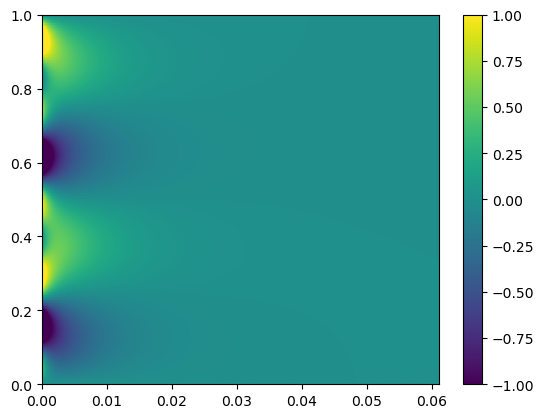

In [11]:
pp.imshow(soln.T, extent=[0,dt*steps,0,1], vmin=-1, vmax=1)
pp.colorbar()
pp.axis('auto');